In [1]:
import pandas as pd
import os
os.listdir()

['continue.png',
 'danmu_12-1-13.csv',
 'discret.png',
 'example.ipynb',
 'score.ipynb',
 'score_box.png',
 'score_hist.png',
 'stopwords-master',
 'wordcloud.jpg',
 '成绩汇总20计算机1班.xlsx',
 '成绩汇总20计算机2班.xlsx',
 '成绩汇总20软件1班.xlsx']

## 数据获取与导入

In [2]:
score1 = pd.read_excel("成绩汇总20计算机1班.xlsx")
score2 = pd.read_excel("成绩汇总20计算机2班.xlsx")
score3 = pd.read_excel("成绩汇总20软件1班.xlsx")
score3.head()

,软件1班,软件一班,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,序号,学号,姓名,lab01,lab02,lab03,lab04,lab05,总分,平均分,最终成绩,NaN,NaN,NaN
1,1,2009200101,陈迪,77,60,66,60,60,323,64.6,74.6,NaN,NaN,NaN
2,2,2009200102,冯稚然,81,69,79,73,71,373,74.6,84.6,NaN,NaN,NaN
3,3,2009200103,顾宇蒙,77,62,78,65,64,346,69.2,79.2,NaN,NaN,NaN
4,4,2009200104,黄睿,60,63,80,58,68,329,65.8,75.8,NaN,NaN,NaN


## 数据预处理

In [3]:
score1 = score1.loc[:,['计算机1班','Unnamed: 1','Unnamed: 2','Unnamed: 10']].dropna(axis = 0, how ='any')
score2 = score2.loc[:,['计算机2班','Unnamed: 1','Unnamed: 2','Unnamed: 13']].dropna(axis = 0, how ='any')
score3 = score3.loc[:,['软件1班','软件一班','Unnamed: 2','Unnamed: 10']].dropna(axis = 0, how ='any')

In [4]:
score1.columns = ['序号', '学号', '姓名', '成绩']
score2.columns = ['序号', '学号', '姓名', '成绩']
score3.columns = ['序号', '学号', '姓名', '成绩']

score1 = score1.drop([0])
score2 = score2.drop([0])
score3 = score3.drop([0])

In [5]:
score1_ = score1.loc[:,["成绩"]].astype("float")
score2_ = score2.loc[:,["成绩"]].astype("float")
score3_ = score3.loc[:,["成绩"]].astype("float")

## 数据可视化

### 三个班各自的成绩分布情况

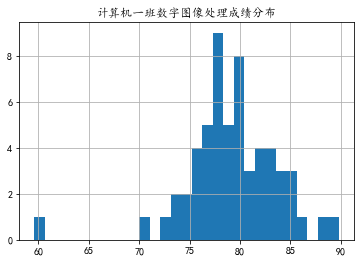

In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

plt.hist(score1_, len(score1_)//2)
plt.grid()
plt.title("计算机一班数字图像处理成绩分布")
plt.show()

In [7]:
score1_[(score1_ >79.5) & (score1_<81)].count()

成绩    9
dtype: int64

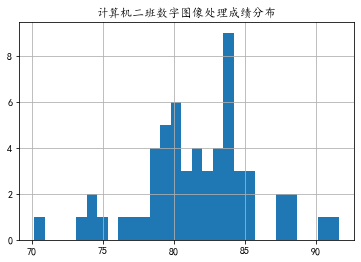

In [8]:
plt.hist(score2_, len(score2_)//2)
plt.grid()
plt.title('计算机二班数字图像处理成绩分布')
plt.show()

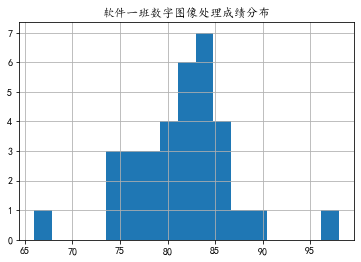

In [9]:
plt.hist(score3_, len(score3_)//2)
plt.grid()
plt.title('软件一班数字图像处理成绩分布')
plt.show()

## 数据分析

### 哪个班成绩最好？

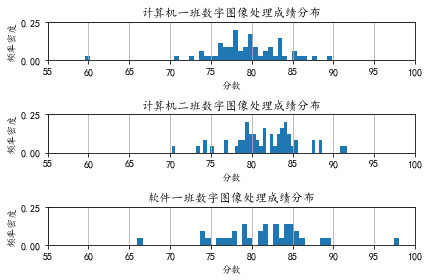

In [10]:
plt.figure()
plt.subplot(3,1,1)
plt.xlim(55, 100)
plt.ylim((0, 0.25))
plt.xlabel("分数")
plt.ylabel("频率密度")
plt.hist(score1_, 50, density=True)
plt.grid()
plt.title("计算机一班数字图像处理成绩分布")
plt.subplot(3,1,2)
plt.xlim(55, 100)
plt.ylim((0, 0.25))
plt.xlabel("分数")
plt.ylabel("频率密度")
plt.hist(score2_, 50, density=True)
plt.grid()
plt.title("计算机二班数字图像处理成绩分布")
plt.subplot(3,1,3)
plt.xlim(55, 100)
plt.ylim((0, 0.25))
plt.xlabel("分数")
plt.ylabel("频率密度")
plt.hist(score3_, 50, density=True)
plt.grid()
plt.title("软件一班数字图像处理成绩分布")
#减少子图堆叠现象
plt.tight_layout()
plt.savefig("score_hist")
plt.show()

### 统计指标比较

#### 均值 $\bar{X} = \frac{1}{n}\sum X_{i}$

In [11]:
import numpy as np
score1_mean = np.asarray(score1_).mean()
score2_mean = np.asarray(score2_).mean()
score3_mean = np.asarray(score3_).mean()
print(f"计算机一班均分：{score1_mean};\n计算机二班均分：{score2_mean};\n软件一班均分：{score3_mean}.")

计算机一班均分：79.2896551724138;
计算机二班均分：81.6896551724138;
软件一班均分：81.47058823529412.


#### 方差 $\sigma ^2 = \frac{1}{n} \sum (X - \bar{X})^2 $

In [12]:
score1_variance = np.sum((score1_-score1_mean)**2)/len(score1_)
score2_variance = np.sum((score2_-score2_mean)**2)/len(score2_)
score3_variance = np.sum((score3_-score3_mean)**2)/len(score3_)

In [13]:
print(f"计算机一班方差：{score1_variance};\n计算机二班方差：{score2_variance};\n软件一班方差：{score3_variance}.")

计算机一班方差：成绩    20.729893
dtype: float64;
计算机二班方差：成绩    16.338169
dtype: float64;
软件一班方差：成绩    30.039723
dtype: float64.


#### 标准差 $\sigma$

In [14]:
score1_sd = np.sqrt(score1_variance)
score2_sd = np.sqrt(score2_variance)
score3_sd = np.sqrt(score3_variance)
print(f"计算机一班标准差：{score1_sd};\n计算机二班标准差：{score2_sd};\n软件一班标准差：{score3_sd}.")

计算机一班标准差：成绩    4.553009
dtype: float64;
计算机二班标准差：成绩    4.04205
dtype: float64;
软件一班标准差：成绩    5.480851
dtype: float64.


#### 中位数

In [15]:
score1_median = score1_.median()
score2_median = score2_.median()
score3_median = score3_.median()
print(f"计算机一班中位数：{score1_median};\n计算机二班中位数：{score2_median};\n软件一班中位数：{score3_median}.")

计算机一班中位数：成绩    79.2
dtype: float64;
计算机二班中位数：成绩    81.6
dtype: float64;
软件一班中位数：成绩    81.8
dtype: float64.


### 箱线图

In [16]:
score1_ = np.asarray(score1_).squeeze()
score2_ = np.asarray(score2_).squeeze()
score3_ = np.asarray(score3_).squeeze()

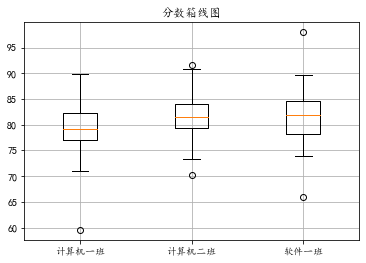

In [17]:
import seaborn as sns

plt.figure()
plt.title("分数箱线图")
labels = ["计算机一班","计算机二班","软件一班"]
plt.grid()
plt.boxplot([score1_, score2_, score3_], labels=labels)
plt.savefig("score_box")
plt.show()